<a href="https://colab.research.google.com/github/I-ULISES-I/Colabfiles/blob/main/practicasregresionlasso_ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Instrucciones y Objetivos para la Práctica: Regresión Lasso y Ridge**

#### **📌 Objetivos de la Práctica:**  
Al finalizar esta práctica, los estudiantes serán capaces de:  
1. **Realizar un Análisis Exploratorio de Datos (EDA)** completo, incluyendo visualización de distribuciones, detección de outliers y análisis de correlaciones.  
2. **Preprocesar datos** correctamente, manejando valores faltantes, codificando variables categóricas y escalando características.  
3. **Implementar modelos de regresión Lasso y Ridge**, entendiendo cómo la regularización afecta los coeficientes.  
4. **Verificar los supuestos de la regresión lineal** (linealidad, normalidad de residuos, homocedasticidad y multicolinealidad).  
5. **Comparar el rendimiento** de ambos modelos y analizar qué variables son más relevantes en cada caso.  

---

### **📋 Instrucciones**  

#### **🔹 Paso 1: Configuración Inicial**
✅ Carga el set de datos que puedes encontrar en el campus virtual
✅ Ejecutar las celdas de importación de librerías y carga del dataset.  
✅ Familiarizarse con los datos usando `.head()`, `.info()` y `.describe()`.  

#### **🔹 Paso 2: Análisis Exploratorio (EDA)**  
📊 **Para variables numéricas:**  
- Generar histogramas y boxplots para identificar distribuciones y outliers.  
- Calcular medidas de tendencia central y dispersión.  

📊 **Para variables categóricas:**  
- Usar gráficos de barras para visualizar frecuencias.    

#### **🔹 Paso 3: Matriz de Correlación**  
✅ Calcular la matriz de correlación **solo para variables numéricas**.  
✅ Generar un **mapa de calor** para visualizar relaciones.  
📌 **Pregunta:** ¿Qué variables están más correlacionadas con el target (`charges`)? (salida del dataset)  

#### **🔹 Paso 4: Preprocesamiento**  
🔧 **Tareas:**  
1. Manejar valores faltantes con `SimpleImputer`.  
2. Codificar variables categóricas con `OneHotEncoder`.  
3. Estandarizar variables numéricas con `StandardScaler`.  
✅ Verificar que el dataset transformado no tenga valores nulos.  

#### **🔹 Paso 5: Modelado (Lasso y Ridge)**  
🎯 **Para cada modelo:**  
1. Ajustar el modelo con los hiperparámetros dados (`alpha=0.1` para Lasso, `alpha=1.0` para Ridge).  
2. Calcular **MSE** y **R²** para evaluar rendimiento.  
3. Analizar los coeficientes para identificar variables importantes.  

📌 **Pregunta:**  
- ¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto?  
- ¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?  

#### **🔹 Paso 6: Verificación de Supuestos**  
📉 **Para cada modelo, verificar:**  
1. **Linealidad** (gráfico de residuos vs predicciones).  
2. **Normalidad de residuos** (QQ-Plot y test de Shapiro-Wilk).  
3. **Homocedasticidad**
4. **Multicolinealidad** (VIF > 10 indica problema).  

📌 **Pregunta:**  
- ¿Se cumplen los supuestos en ambos modelos?  
- Si hay heterocedasticidad, ¿cómo podría solucionarse?  

#### **🔹 Paso 7: Comparación Final**  
📊 **Analizar:**  
- ¿Qué modelo es más interpretable?  
- ¿Cuál reduce mejor el sobreajuste?  
- ¿Qué variables son más importantes en cada caso?  

---

### **📌 Entrega de la Práctica**  
Al finalizar la practica, incluye un texto con los siguientes elementos
- Incluir **comentarios explicativos** en cada paso.  
- Responder las **preguntas planteadas** en celdas Markdown.  

🎯 **Criterios de Evaluación:**  
✔ **Correcto preprocesamiento** (manejo de nulos, escalado, encoding).  
✔ **Análisis visual y estadístico** (gráficos claros, interpretación de resultados).  
✔ **Validación de supuestos** (justificación de si se cumplen o no).  
✔ **Comparación crítica** entre Lasso y Ridge.  

# **Paso 1: Configuración Inicial**

In [315]:
#Importación de librerías.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
import scipy.stats as stats
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Carga de conjunto de datos.
df = pd.read_csv('drive/MyDrive/ClassFiles/insurance.csv')

#Impresión de descripción de datos.
print(df.head(), "\n")
print(df.info(), "\n")
print(df.describe())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None 

               age          bmi     children       charges
count  1338.000000  1338.000

# **Paso 2: Análisis Exploratorio (EDA)**

## **Variables Númericas**

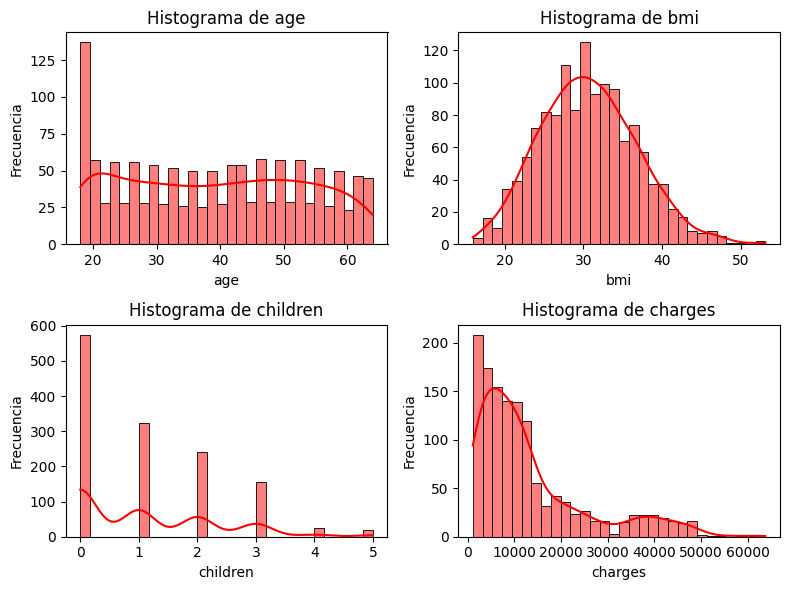

In [316]:
#Selección de variables númericas.
variables_numericas = df.select_dtypes(include=['int64', 'float64']).columns

#Creación y diseño de histogramas.
plt.figure(figsize=(8, 6))
for i, variable in enumerate(variables_numericas, 1):
  plt.subplot(2, 2, i)
  sns.histplot(df[variable], kde=True, bins=30, color='red')
  plt.title(f"Histograma de {variable}")
  plt.xlabel(variable)
  plt.ylabel("Frecuencia")

#Impresión de histogramas.
plt.tight_layout()
plt.show()

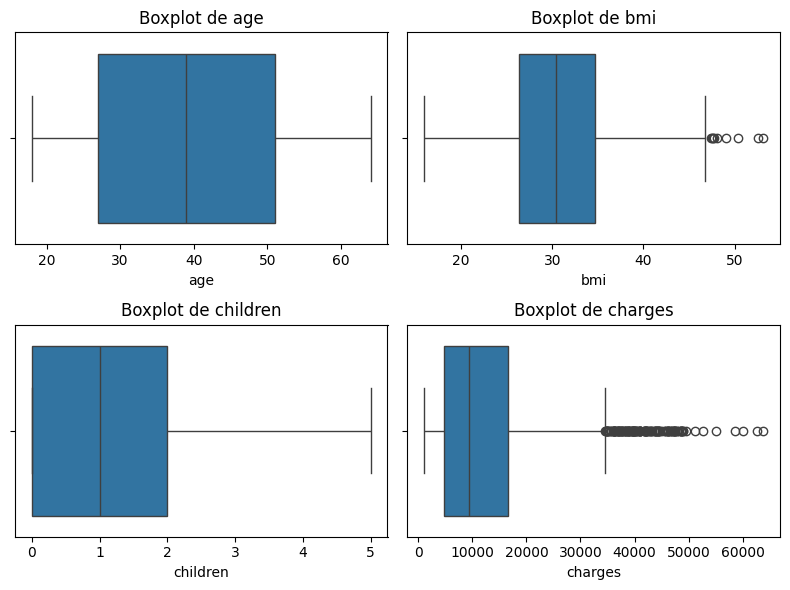

In [317]:
#Creación y diseño de boxplots.
plt.figure(figsize=(8, 6))
for i, variable in enumerate(variables_numericas, 1):
  plt.subplot(2, 2, i)
  sns.boxplot(x=df[variable])
  plt.title(f"Boxplot de {variable}")

#Impresión de boxplots.
plt.tight_layout()
plt.show()

In [318]:
#Impresión de estadísticas descrptivas.
print(df[variables_numericas].describe(), "\n")

#Impresión de modas.
print(df[variables_numericas].mode().iloc[0])

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010 

age           18.0000
bmi           32.3000
children       0.0000
charges     1639.5631
Name: 0, dtype: float64


## **Variables Categóricas**

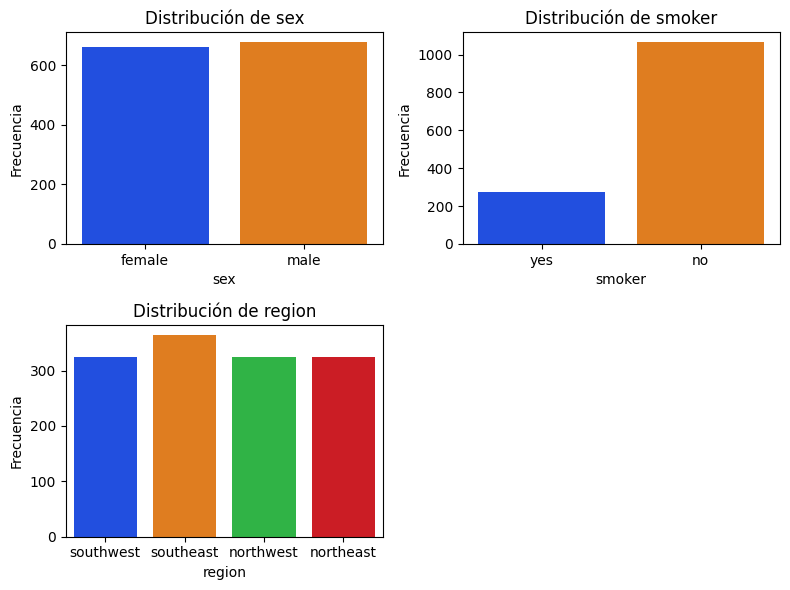

In [319]:
#Selección de variables categóricas.
variables_categoricas = df.select_dtypes(include='object').columns

#Creación y diseño de gráficas de barras.
plt.figure(figsize=(8, 6))
for i, variable in enumerate(variables_categoricas, 1):
  plt.subplot(2, 2, i)
  sns.countplot(x=variable, data=df, hue=variable, palette='bright', legend=False)
  plt.title(f"Distribución de {variable}")
  plt.xlabel(variable)
  plt.ylabel("Frecuencia")

#Impresión de gráficas de barras.
plt.tight_layout()
plt.show()

# **Paso 3: Matriz de Correlación**

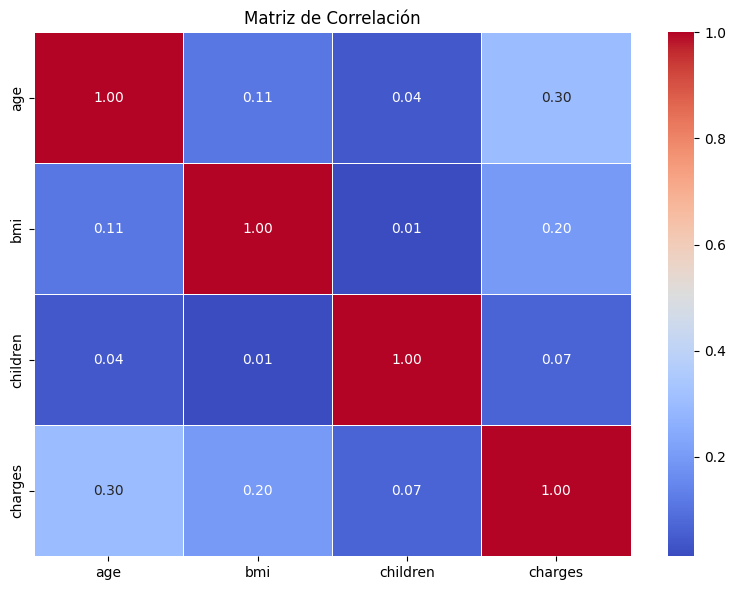

In [320]:
#Cálculo de matriz de correlación.
matriz_correlacion = df[variables_numericas].corr()

#Creación y diseño de mapa de calor.
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlación")

#Impresión de mapa de calor.
plt.tight_layout()
plt.show()

📌 **Pregunta:** ¿Qué variables están más correlacionadas con el target (`charges`)? (salida del dataset) Las variables “age” y “bmi”, con un valor de 0.30 y 0.20 respectivamente.

# **Paso 4: Preprocesamiento**

In [321]:
#Impresión de valores nulos.
print(df.isnull().sum())

#Separación de variable objetivo.
variables_numericas = variables_numericas.drop('charges')

#Creación de preprocesador.
preprocesador = ColumnTransformer([
    ("categoricas", OneHotEncoder(drop='first'), variables_categoricas),
    ("numericas", StandardScaler(), variables_numericas)
])

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


# **Paso 5: Modelado (Lasso y Ridge)**

## **Lasso**

In [322]:
#Definición de parámetro.
alpha_lasso = 0.1

#Creación de pipeline.
lasso = Pipeline([("preprocesador", preprocesador), ("lasso", Lasso(alpha=alpha_lasso))])

#Definición de variables predictoras y variable objetivo.
x_lasso = df.drop(columns='charges')
y_lasso = df['charges']

#Entrenamiento del modelo.
lasso.fit(x_lasso, y_lasso)

#Evaluación del modelo.
y_predicha_lasso = lasso.predict(x_lasso)
MSE_lasso = mean_squared_error(y_lasso, y_predicha_lasso)
R2_lasso = r2_score(y_lasso, y_predicha_lasso)

#Obtención de coeficientes.
nombres_caracteristicas_lasso = list(variables_numericas)
nombres_caracteristicas_lasso += list(lasso.named_steps["preprocesador"].named_transformers_["categoricas"].get_feature_names_out())
coeficientes_lasso = pd.Series(lasso.named_steps["lasso"].coef_, index=nombres_caracteristicas_lasso)

#Impresión de resultados.
print(f"MSE: {MSE_lasso:.2f}")
print(f"R^2: {R2_lasso:.4f}\n")
print(coeficientes_lasso)

MSE: 36501893.68
R^2: 0.7509

age                  -130.858181
bmi                 23847.874353
children             -351.297677
sex_male            -1033.232811
smoker_yes           -958.346180
region_northwest     3607.401250
region_southeast     2067.478332
region_southwest      572.886722
dtype: float64


## **Ridge**

In [323]:
#Definición de parámetro.
alpha_ridge = 1.0

#Creación de pipeline.
ridge = Pipeline([("preprocesador", preprocesador), ("ridge", Ridge(alpha=alpha_ridge))])

#Definición de variables predictoras y variable objetivo.
x_ridge = df.drop(columns='charges')
y_ridge = df['charges']

#Entrenamiento del modelo.
ridge.fit(x_ridge, y_ridge)

#Evaluación del modelo.
y_predicha_ridge = ridge.predict(x_ridge)
MSE_ridge = mean_squared_error(y_ridge, y_predicha_ridge)
R2_ridge = r2_score(y_ridge, y_predicha_ridge)

#Obtención de coeficientes.
nombres_caracteristicas_ridge = list(variables_numericas)
nombres_caracteristicas_ridge += list(ridge.named_steps["preprocesador"].named_transformers_["categoricas"].get_feature_names_out())
coeficientes_ridge = pd.Series(ridge.named_steps["ridge"].coef_, index=nombres_caracteristicas_ridge)

#Impresión de resultados.
print(f"MSE: {MSE_ridge:.2f}")
print(f"R^2: {R2_ridge:.4f}\n")
print(coeficientes_ridge)

MSE: 36503887.63
R^2: 0.7509

age                  -124.200613
bmi                 23737.991359
children             -347.825073
sex_male            -1018.540799
smoker_yes           -952.384021
region_northwest     3604.096982
region_southeast     2064.858647
region_southwest      573.073125
dtype: float64


📌 **Pregunta:**  
- ¿Qué modelo tiene un mejor R²? Ambos tienen el mismo valor de $R^2$. ¿Por qué crees que ocurre esto? Es posible que se deba al valor que se le está asignando a "lambda", ya que es éste el parámetro que hace la selección de características de manera automática.
- ¿Qué variables tienen coeficientes cercanos a cero en Lasso? Ninguna. ¿Por qué? Por el valor que tiene "lambda". Dado que es extremadamente bajo, se está tratando de asegurar de que todas las variables independientes se mantengan dentro del modelo.

# **Paso 6: Verificación de Supuestos**

## **Lasso**

### **Linealidad y Homocedasticidad**

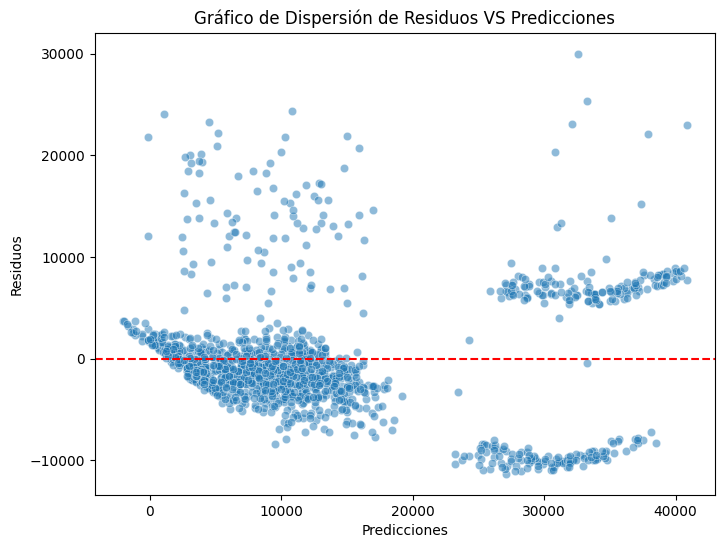

In [330]:
#Cálculo de residuos.
residuos_lasso = y_lasso - y_predicha_lasso

#Creación y diseño de gráfico de dispersión.
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_predicha_lasso, y=residuos_lasso, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfico de Dispersión de Residuos VS Predicciones")

#Impresión de gráfico de dispersión.
plt.show()

### **Normalidad de Residuos**

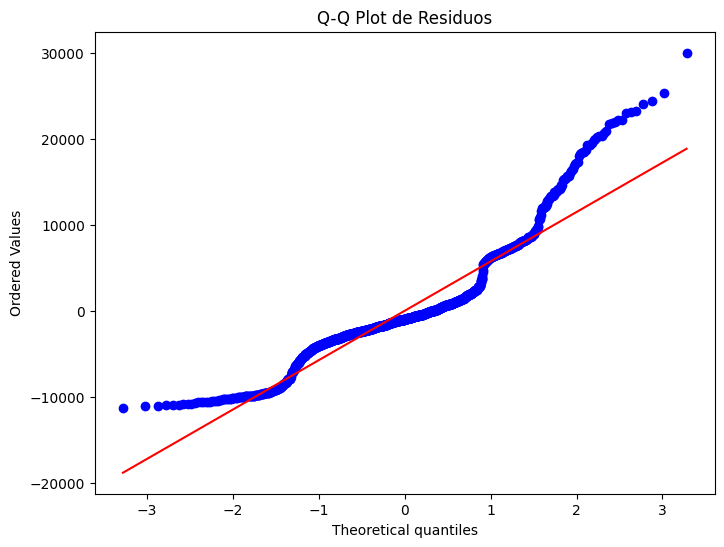


Prueba Shapiro-Wilk: p-valor = 8.3555e-29


In [331]:
#Creación y diseño de Q-Q plot.
plt.figure(figsize=(8, 6))
stats.probplot(residuos_lasso, dist='norm', plot=plt)
plt.title("Q-Q Plot de Residuos")

#Impresión de Q-Q plot.
plt.show()

#Cálculo e impresión de prueba de normalidad.
prueba_shapiro_lasso = stats.shapiro(residuos_lasso)
print(f"\nPrueba Shapiro-Wilk: p-valor = {prueba_shapiro_lasso.pvalue:.5}")

### **Multicolinealidad**

In [332]:
#Cálculo de multicolinealidad.
constante_lasso = add_constant(df[variables_numericas])
datos_vif_lasso = pd.DataFrame()
datos_vif_lasso['Variable'] = constante_lasso.columns
datos_vif_lasso['VIF'] = [variance_inflation_factor(constante_lasso.values, i) for i in range(constante_lasso.shape[1])]

#Impresión de resultados.
print(datos_vif_lasso)

   Variable        VIF
0     const  31.954929
1       age   1.013816
2       bmi   1.012152
3  children   1.001874


## **Ridge**

### **Linealidad y Homocedasticidad**

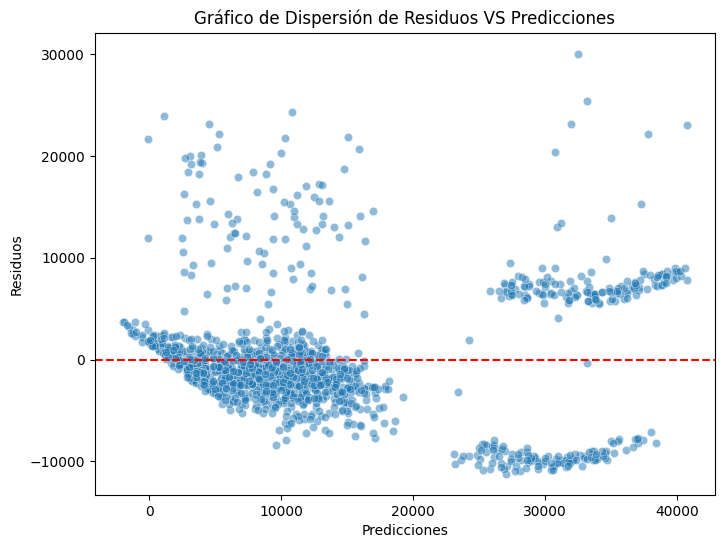

In [327]:
#Cálculo de residuos.
residuos_ridge = y_ridge - y_predicha_ridge

#Creación y diseño de gráfico de dispersión.
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_predicha_ridge, y=residuos_ridge, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfico de Dispersión de Residuos VS Predicciones")

#Impresión de gráfico de dispersión.
plt.show()

### **Normalidad de Residuos**

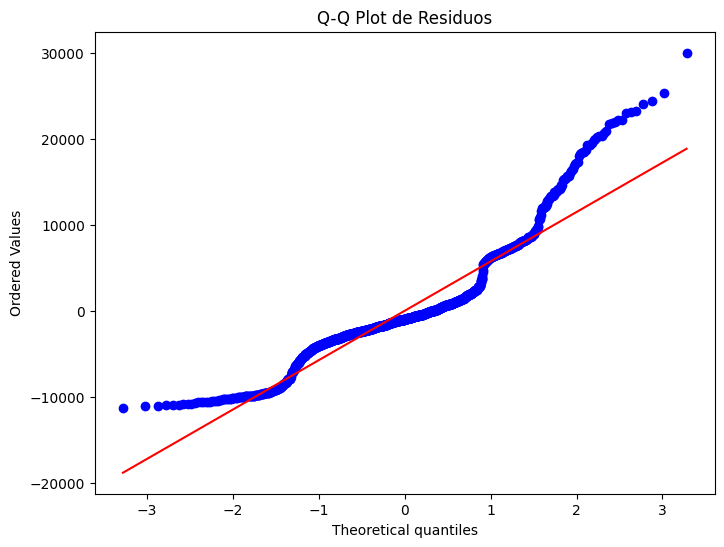


Prueba Shapiro-Wilk: p-valor = 6.4588e-29


In [328]:
#Creación y diseño de Q-Q plot.
plt.figure(figsize=(8, 6))
stats.probplot(residuos_lasso, dist='norm', plot=plt)
plt.title("Q-Q Plot de Residuos")

#Impresión de Q-Q plot.
plt.show()

#Cálculo e impresión de prueba de normalidad.
prueba_shapiro_ridge = stats.shapiro(residuos_ridge)
print(f"\nPrueba Shapiro-Wilk: p-valor = {prueba_shapiro_ridge.pvalue:.5}")

### **Multicolinealidad**

In [329]:
#Cálculo de multicolinealidad.
constante_ridge = add_constant(df[variables_numericas])
datos_vif_ridge = pd.DataFrame()
datos_vif_ridge['Variable'] = constante_ridge.columns
datos_vif_ridge['VIF'] = [variance_inflation_factor(constante_ridge.values, i) for i in range(constante_ridge.shape[1])]

#Impresión de resultados.
print(datos_vif_ridge)

   Variable        VIF
0     const  31.954929
1       age   1.013816
2       bmi   1.012152
3  children   1.001874


📌 **Pregunta:**  
- ¿Se cumplen los supuestos en ambos modelos? No, sin embargo, ambos modelos no presentan multicolinealidad.
- Si hay heterocedasticidad, ¿cómo podría solucionarse? Si, hay heterocedasticidad, ya que los residuos tienden a estar agrupados y dispersos para valores similares. Para resolver esto, se podría aplicar algún proceso de transformación a las variables.

# **Paso 7: Comparación Final**

📊 **Analizar:**  
- ¿Qué modelo es más interpretable?  
- ¿Cuál reduce mejor el sobreajuste?  
- ¿Qué variables son más importantes en cada caso?

Ambos modelos son muy similares. Tanto las métricas como los valores de los coeficientes son casi idénticos. Cabe aclarar que se tiene la sospecha de que la transformación de las variables no se está haciendo de manera adecuada; se debe realizar una revisión para descartar esta posibilidad. El código no presenta problemas y la lógica del procedimiento está basada en el laboratorio proporcionado, por lo que es necesario realizar una consulta con el docente para aclarar dudas.